<a href="https://colab.research.google.com/github/phu-minh/CS115-PCAandSVD/blob/main/CS115_SVD_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Đồ án CS115


In Linear Algebra, we learned about diagonalization: a square matrix $A \in R^{n\times n}$ is diagonalizable if exist an invertible matrix $P$ and a diagonal matrix $D$ so that:
 $$ \mathbf{A} = \mathbf{P} \mathbf{D} \mathbf{P}^{-1} $$
But it only happens in the square matrix, not all kinds of the matrix. So **Singular Value Decomposition** (SVD) is a ***special matrix factorization*** method for  *any* real matrix, which helps us a lot in working with matrix and big data: storing matrix, finding features in data reduction, dimensional reduction, etc. It's considered as a foundation of Machine Learning, one of the most useful tools in numerical linear algebra numerical for data processing. It's also the basis of Principal Component Analysis (PCA) - a wide technique for analyzing high dimensional data. SVD is the basis of the facial recognition algorithm.

#### Introduction to SVD


The singular value decomposition of a matrix is usually referred to as the SVD.
This is the final and best factorization of any matrix:

$$\mathbf{A}_{m \times n} = \mathbf{U}_{m \times m}\mathbf{\Sigma}_{m \times n} (\mathbf{V}_{n \times n})^T  ~~~~~(1)$$

where $U$ is **orthonormal**,  $\Sigma$ is almost a **diagonal** matrix - only contains real numbers ordered **descending** $\sigma_{1,2,....m}$ in main **diagonal** line ,$V$ is also **orthonormal**

<br/>
<br/>

The image below describes the SVD for matrix A in 2 cases: $m < n $ and $m > n$   

<img src="https://machinelearningcoban.com/assets/26_svd/svd.png" width="75%" height="75%"/>

#### Math Revision

1. Orthogonal matrix and orthnormal vector

  * We say that 2 vectors are orthogonal if they are non-zero vectors and perpendicular to each other. i.e their dot product equal to zero.  For example, $u$ and $v$ are orthogonal if $u^Tv = 0$.
  * We say that a set of vectors $\{\vec{u_1}, \vec{u_2},...,\vec{u_n}\}$ is mutually orthogonal if every pair of vectors is orthogonal.
  * 2 vectors are orthonormal if they are orthogonal and their magnitude equal to $1$.
  * A set of vectors $\{\vec{u_1}, \vec{u_2},...,\vec{u_n}\}$ is orthonormal if every pair of vectors is orthonomal. i.e.
    \begin{equation}
      u_i^Tu_j = 
      \begin{cases}
        1, & i = j \\
        0, & i \neq j
      \end{cases}
    \end{equation}
  * A square matrix $Q$ is called an orthogonal matrix if the columns and rows of $Q$ are orthonormal vectors. i.e. $Q^TQ = QQ^T = I = QQ^{-1}$ so $Q^T = Q^{-1}$
  * Determinant of an orthogonal matric $Q$ can be equal to $1$ or $-1$ because $det(Q) = det(Q^T)$ and $det(Q)det(Q^T) = det(I) = 1$.

2. Gram - Schmidt Alogorithm 

  For a set of linearly independent vectors $\{\vec{v_1}, \vec{v_2},...,\vec{v_n}\}$ $\in$ $\mathbb{R}^n$, we can construct an orthonormal set of vectors:
  
  * Let $u_1 = \frac{v_1}{\lVert v_1 \rVert}$

  * For $i = 2$ to $n$:
    * Orthogonalization: $u_i = v_i - (u_{i-1}^Tv_i)u_{i-1} - ... - (u_1^Tv_i)u_1$
    * Normalization: $u_i = \frac{u_i}{\lVert u_i \rVert}$
  
  For example: a matrix $A =
  \begin{bmatrix}
  1 & 1\\
  1 & -1
  \end{bmatrix}
  $ with a set of vectors $a_1 = \begin{bmatrix}1\\1\end{bmatrix}$ and $a_2 = \begin{bmatrix}1\\-1\end{bmatrix}$.
  * Check independently matrix: $det(A) = -2 \neq 0$
  * Let $u_1 = \frac{a_1}{\lVert a_1 \rVert} = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix}$
  * $i = 2$:
  $u_2 = a_2 - (u_1^Ta_2)u_1 = \begin{bmatrix} 1 \\ -1 \end{bmatrix}$
  * $u_2 = \frac{u_2}{\lVert u_2 \rVert} = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{-1}{\sqrt{2}} \end{bmatrix}$
  * So matrix $A$ after orthonormalization:
  $A = \begin{bmatrix}
  \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\\
  \frac{1}{\sqrt{2}} & \frac{-1}{\sqrt{2}}
  \end{bmatrix}$


####Caculating SVD

Ignoring dimension of the matrix, base on equation $(1)$ we can compute $AA^T$ like this:

\begin{eqnarray}
\mathbf{AA}^T &=& \mathbf{U}\mathbf{\Sigma} \mathbf{V}^T (\mathbf{U}\mathbf{\Sigma} \mathbf{V}^T)^T \ 
&=& \mathbf{U}\mathbf{\Sigma} \mathbf{V}^T \mathbf{V}\mathbf{\Sigma}^T\mathbf{U}^T \ 
&=& \mathbf{U}\mathbf{\Sigma}\mathbf{\Sigma}^T\mathbf{U}^T = \mathbf{U}\mathbf{\Sigma}\mathbf{\Sigma}^T\mathbf{U}^{-1}  ~~~~~ (2)
\end{eqnarray}


$\Sigma \Sigma^T$ is a diagonal matrix contains $\sigma^2_{1},\sigma^2_{2}...\sigma^2_{m}$. These $\sigma^2$ is egien values of $AA^T$. Cause $AA^T$ is a positive semi-definite matrix so its eigen values is not negative. Those $\sigma_j$ is square root of $AA^T$ eigen values - also called as *singular values*. Column vectors of $U$ are eigen vectors of $AA^T$. We call these vectors are *left-singular vectors*.
</br> 

In the otherhand, caculating $A^TA$ will look like this:
\begin{eqnarray}
\mathbf{A}^T\mathbf{A} &=& (\mathbf{U}\mathbf{\Sigma} \mathbf{V}^T)^T \mathbf{U}\mathbf{\Sigma} \mathbf{V}^T \ 
&=& \mathbf{V}\mathbf{\Sigma}^T\mathbf{U}^T   \mathbf{U}\mathbf{\Sigma} \mathbf{V}^T \
&=& \mathbf{V}\mathbf{\Sigma}^T\mathbf{\Sigma}\mathbf{V}^T =  \mathbf{V}\mathbf{\Sigma}^T\mathbf{\Sigma}\mathbf{V}^{-1} ~~~~~ (3)
\end{eqnarray}

Similar to $AA^T$, column vectors of $V$ are eigen vectors of $A^TA$. We call these vectors are *right-singular vectors*.


</br>
Prove eigenvalues of $A^T A$ and $A A^T$ are the same!

 Let $\lambda \ne 0$ be an eigenvalue of $A^T A$ with corresponding eigenvector $ \mathbf v \ne \mathbf 0$ :
\begin{eqnarray*}
 \Rightarrow A^T A \mathbf v &=& \lambda \mathbf v\\
 \Leftrightarrow AA^T A \mathbf v &=& \lambda A \mathbf v \\
 \Leftrightarrow AA^T \mathbf u &=& \lambda u ~~~(u=Av)
\end{eqnarray*}
 $\lambda$ is an eigenvalue of $A A^T$ as well, with eigenvector $\mathbf u = A \mathbf v$.
 Now show that if $\lambda$ s eigenvalue for $AA^T$ with corresponding eigenvector $\mathbf u \ne \mathbf 0$
\begin{eqnarray*}
 \Rightarrow AA^T\mathbf u &=& \lambda \mathbf u\\
 \Leftrightarrow A^TAA^T \mathbf u &=& \lambda A^T \mathbf u \\
 \Leftrightarrow A^TA \mathbf z  &=& \lambda \mathbf z ~~~(z=A^Tu)
\end{eqnarray*}

So eigenvalues of $A^T A$ and $A A^T$ are the same! $(4)$

From $(2)(3)(4)$, we can get matrix $\Sigma, U , V$ just by diagonalizing $A^TA$ or $AA^T$.
</br>

Image depicting the transfer facility in svd:
<img src="http://habrastorage.org/files/3ca/397/588/3ca39758812f4e159a9785ef44e92fe1.png" width="75%" height="75%"/>


In [ ]:
import numpy as np
from numpy import linalg

m, n = 3, 5 #m.n dim
A = np.random.randint(0,50,(m, n)) #random A matrix
print('A = \n', A)
#caculating the SVD of A
U, S, V = linalg.svd(A)

#creating matrix S cause  linalg.svd just return Sigma as an array
Smatrix = np.zeros((m,n))
for i in range(np.linalg.matrix_rank(A)):
    Smatrix[i,i] += S[i]

print('\nU = \n', U)
print('\nS = \n',Smatrix)
print('\nV = \n',V)

A = 
 [[13 21 43 28 48]
 [38  7 15 42 35]
 [14  9 18 16 44]]

U = 
 [[-0.66089674  0.5691781  -0.48913371]
 [-0.58557059 -0.79874413 -0.13825663]
 [-0.46938533  0.19504896  0.86118135]]

S = 
 [[108.84987859   0.           0.           0.           0.        ]
 [  0.          31.68691064   0.           0.           0.        ]
 [  0.           0.          13.95147391   0.           0.        ]]

V = 
 [[-0.34372785 -0.20397169 -0.41939463 -0.46494529 -0.66946302]
 [-0.63819021  0.25616167  0.50507851 -0.45727031  0.25078679]
 [ 0.03182809 -0.25007911 -0.5451277  -0.41025204  0.68627725]
 [-0.58237125  0.35441685 -0.47334755  0.54739454  0.10739521]
 [-0.36659939 -0.83941997  0.21859033  0.32677549  0.08009403]]


But in practice, we dont compute both equation $(2)(3)$. We choose 1 equation, compute $U$ or $V$ and $\Sigma$, then using the definition of SVD $(1)$ to compute the leftover.
Example:

$$A = \begin{pmatrix} 5 & 5 \\ -1 & 7 \end{pmatrix} $$

We're using equation $(3)$
$$ A^TA = \begin{pmatrix} 5 & -1 \\ 5 & 7 \end{pmatrix} \begin{pmatrix} 5 & 5 \\ -1 & 7 \end{pmatrix} = \begin{pmatrix} 26 & 18 \\ 18 & 74 \end{pmatrix} $$
Diagonalizing $A^TA$, we got $\Sigma, V$.
$$det(A^TA - \lambda I ) = 0$$
$$ \lambda^2 - 100\lambda + 1600 = 0$$
$$ (\lambda - 20 )(\lambda-80) = 0$$
$$=> \lambda = 80,20$$
$with \, \lambda_1 = 80 $
$$A^TA - 80I = \begin{pmatrix} -54 & 18 \\ 18 & -6 \end{pmatrix}$$
$$ => v_1 = \begin{pmatrix} 1\\ 3 \end{pmatrix} $$

$with \, \lambda_2 = 20 $
$$A^TA - 20I = \begin{pmatrix} 6 & 18 \\ 18 & 54 \end{pmatrix}$$
$$ => v_2 = \begin{pmatrix} -3 \\ 1 \end{pmatrix}  $$
But $v1,v2$ is orthogonal already. Normalizing $v_1, v_2$ .So now, we got:

$$ \Sigma = \begin{pmatrix} 4\sqrt{5}& 0 \\ 0 & 2\sqrt{5} \end{pmatrix} ,
V = \begin{pmatrix} 1/\sqrt{10} & -3/\sqrt{10} \\ 3/\sqrt{10} & 1/\sqrt{10} \end{pmatrix} $$

Now we use the SVD defination:

$$ A = U \Sigma V^T $$
$$ AV = U \Sigma $$

$$ AV = \begin{pmatrix} 5 & 5 \\ -1 & 7 \end{pmatrix} 
\begin{pmatrix} 1/\sqrt{10} & -3/\sqrt{10} \\ 3/\sqrt{10} & 1/\sqrt{10} \end{pmatrix} =  \begin{pmatrix} 2\sqrt{10} & -\sqrt{10} \\ 2\sqrt{10} & \sqrt{10} \end{pmatrix} = U \Sigma$$

$$=> U = AV\Sigma^{-1}=  \begin{pmatrix} 2\sqrt{10} & -\sqrt{10} \\ 2\sqrt{10} & \sqrt{10} \end{pmatrix}
 \begin{pmatrix} \sqrt{5}/20 & 0 \\ 0 & \sqrt{5}/10 \end{pmatrix} =
 \begin{pmatrix} 1/\sqrt{2} & -1/\sqrt{2} \\ 1/\sqrt{2} & 1/\sqrt{2} \end{pmatrix}
  $$

Conclusion, we got 3 matrix $U, \Sigma, V$ as a result after SVD-factorization matrix $A$
$$A = \begin{pmatrix} 5 & 5 \\ -1 & 7 \end{pmatrix} = U\Sigma V^T $$

$$U = \begin{pmatrix} 1/\sqrt{2} & -1/\sqrt{2} \\ 1/\sqrt{2} & 1/\sqrt{2} \end{pmatrix}
, \Sigma = \begin{pmatrix} 1/\sqrt{10} & -3/\sqrt{10} \\ 3/\sqrt{10} & 1/\sqrt{10} \end{pmatrix}
, V =\begin{pmatrix} 1/\sqrt{10} & -3/\sqrt{10} \\ 3/\sqrt{10} & 1/\sqrt{10} \end{pmatrix} 
$$

####Some special SVD

In reality, data is very complex, it can be lots of entries and features. For example, human genetic data can be a sequence of thousand features and there are thousands of people - which is huge; finding "eigenface" of people for facial recognition, a gray picture contains 1 face, may have a size 400 x 400 pixel, having different lighting condition, enormous data like that can't be interpreted and analyzed. Even though, after doing SVD with these data, it's still large. Truncated SVD will help us solve this big data problem. We will store a part of the origin SVD, but still knowing the main features.

###### *Compacted SVD*

Equation $(1)$ can be written as below:
  $$ \mathbf{A} = \sigma_1 \mathbf{u}_1 \mathbf{v}^T_1 + \sigma_2\mathbf{u}_2\mathbf{v}_2^T + \dots + \sigma_r\mathbf{u}_r\mathbf{v}_r^T $$
with every $u_i v_i^T, 1 \leq i \leq r$ is a rank-1 matrix.

In this formula, $A$ only depends on *first r columns* of $U,V$ and *r* non-values in main diagonal line of $\Sigma$. So we have a better decomposition called ***compacted SVD***: 
$$ \mathbf{A} = {\mathbf{U}}_r{\Sigma}_r({\mathbf{V}}_r)^T $$
If our $A$ has a smaller rank than *columns and rows* of $A$, meaning $ r \ll m,n$, we have benefit of compacted SVD in storing data.


<img src="https://machinelearningcoban.com/assets/26_svd/svd_truncated.png" width="75%" height="50%"/>



###### *Truncated SVD*
Remembered, $\sigma$ values in the main diagonal line of $\Sigma$ is non-zero and ordered descending. In common, some first values of $\sigma_i$ are large, remaining values are small and can be zero. We don't want to store all the values in the SVD. Then, we can approximate matrix  $A \approx \hat{A} $ equal to sum of $k < r$ rank 1 matrices

$$\mathbf{A} \approx \mathbf{\hat{A} } = U_k \Sigma_k V_k^T = \sigma_1 \mathbf{u}_1 \mathbf{v}^T_1 + \sigma_2\mathbf{u}_2\mathbf{v}_2^T + \dots + \sigma_k\mathbf{u}_k\mathbf{v}_k^T $$

Pushing away $r-k$ small and non-zero values in *SVD* is called ___Truncated SVD___. The error of subtraction $A-A_k$ is calculated by the Frobenius norm of the subtraction. But we have a theorem for it. *The error will equal a total square of the cut-off eigenvalues in truncated SVD*.

$$ ||\mathbf{A} - \mathbf{A}_k||_F^2 = \sum_{i = k + 1}^r \sigma_i^2 ~~~ (4)$$
Proof: 
\begin{eqnarray}
    ||\mathbf{A} - \mathbf{A}_k||_F^2 & = & ||\sum_{i = k + 1}^r \sigma_i \mathbf{u}_i\mathbf{v}_i^T ||_F^2   \\
    & = & \text{trace}\left\{ \left(\sum_{i = k + 1}^r \sigma_i \mathbf{u}_i\mathbf{v}_i^T\right)
    \left(\sum_{j = k + 1}^r \sigma_j \mathbf{u}_j\mathbf{v}_j^T\right)^T
    \right\} \ \\
    &=& \text{trace}\left\{ \sum_{i = k + 1}^r \sum_{j = k + 1}^r \sigma_i\sigma_j \mathbf{u}_i\mathbf{v}_i^T \mathbf{v}_j \mathbf{u}_j^T
    \right\}  \\
    &=& \text{trace}\left\{ \sum_{i = k + 1}^r  \sigma_i^2\mathbf{u}_i\mathbf{u}_i^T
    \right\}  \\
    &=& \text{trace}\left\{ \sum_{i = k + 1}^r  \sigma_i^2
    \right\}   \\
    & = & \sum_{i = k + 1}^r \sigma_i^2 & 
\end{eqnarray}

With $k=0$, we got: 
$$ ||\mathbf{A}||_F^2 = \sum_{i = 1}^r \sigma_i^2~~~~ (4) $$
Fron $(4)(11)$ we can infer:
$$ \frac{||\mathbf{A} - \mathbf{A}_k||_F^2}{||\mathbf{A}||_F^2} = {\frac{\sum_{i = k + 1}^r \sigma_i^2}{\sum_{j = 1}^r \sigma_j^2}}
$$
Thus, *the error of this approximation is very small if the cut-off eigen values are negligible for comparing to first k eigen values*. The theorem $(4)$ is important for calculating how much information we want to store. From equation $(12)$, we can pick smallest $k$ for storing up to $y \% $ information. We can call it a low-rank approximation.




###### *Best k-rank approximation*

This course : <a href="https://www.cs.princeton.edu/courses/archive/spring12/cos598C/svdchapter.pdf">SVD - Princeton Course</a> proving that $A_k$ is also a root in this optimization problem: 
\begin{eqnarray}
\min_{\mathbf{B}} &&||\mathbf{A} - \mathbf{B}||_F \ ~~~~~~
\text{s.t.} ~~ \text{rank}(\mathbf{B}) = k ~~~ ()
\end{eqnarray}

In above proof, $||\mathbf{A} - \mathbf{A}_k||_F^2 = \sum_{i = k + 1}^r \sigma_i^2 ~~~~ (4)$. If we using 2-norm instead of Frobeneous norm (F-norm) to calculate the error, $A_k$ is also a root for that opimization problem:

\begin{eqnarray}
\min_{\mathbf{B}} &&||\mathbf{A} - \mathbf{B}||_2 \  ~~~~~~
\text{s.t.} && \text{rank}(\mathbf{B}) = k ~~~ ()
\end{eqnarray}



####Application of SVD


##### Image compression
Ok we will jump into a real example about image comrepssion using SVD. We are having a high resolution image, but storing full size of it will consume memory. So we compress the picture but we can still regconize the picture. The picture still has its main features.

In [ ]:
# Get image
!wget -q -O test.jpg https://deadline.com/wp-content/uploads/2019/07/david-beckham.jpg

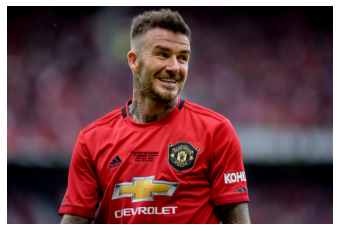

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

# Show image
img = mpimg.imread('test.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

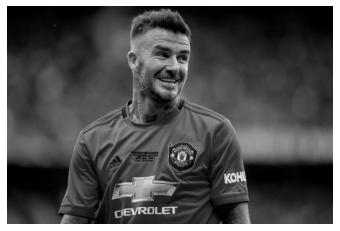

In [ ]:
# convert image to grayscale
gray = np.dot(img[:,:,:], [0.2989, 0.5870, 0.1140])
# Show gray image
plt.imshow(gray, cmap = 'gray')
plt.axis('off')
plt.show()

In [ ]:
# SVD
from numpy import linalg as LA 
U, S, Vt = LA.svd(gray, full_matrices=False)
print(U.shape, S.shape, Vt.shape)

(2336, 2336) (2336,) (2336, 3500)


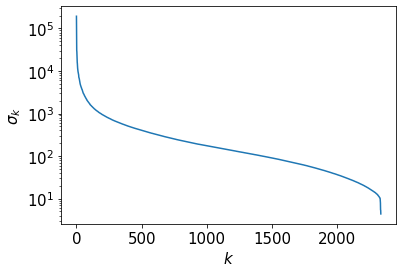

In [ ]:
# Show relationship between k and sigma
plt.semilogy(S) 
plt.xlabel('$k$', fontsize = 15)
plt.ylabel('$\sigma_k$', fontsize = 15)
plt.tick_params(axis='both', labelsize=15)
plt.show()

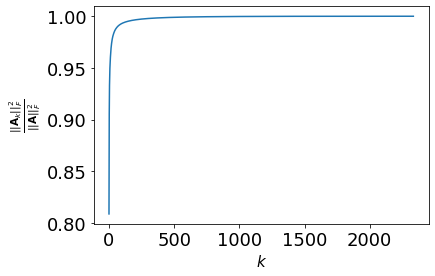

In [ ]:
# Show ratio squared norm F of A_k and A
a = np.sum(S**2)
b = np.zeros_like(S)
for i in range(S.shape[0]):
    b[i] = np.sum(S[:i+1]**2, axis = 0)/a
plt.plot(b)
plt.xlabel('$k$', fontsize = 15)
plt.ylabel(r'$\frac{||\mathbf{A}_k||_F^2}{||\mathbf{A}||_F^2}$', fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()
    

In [ ]:
# error
e = 1 - b

def approx_rank_k(U, S, V, k):
    # truncated
    Uk = U[:, :k]
    Sk = S[:k]
    Vk = V[:k, :]
    return np.around(Uk.dot(np.diag(Sk)).dot(Vk))

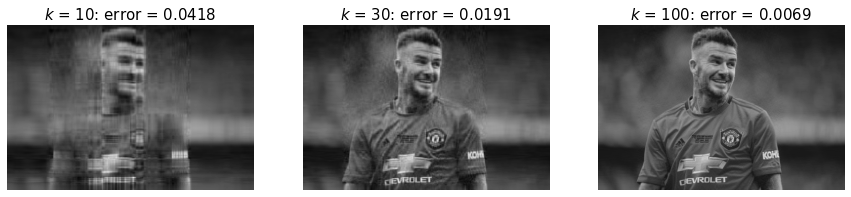

In [ ]:
# Demo images at k = 10, 30, 100
approx_mat = []
K = [10, 30, 100]
for k in K:
    approx_mat.append(approx_rank_k(U, S, Vt, k))

nrows, ncols = int(len(K)/3), 3      
width = 5*ncols
height = 5*nrows
plt.close('all')
fig,axs=plt.subplots(nrows,ncols,figsize=(width,height)) 

for i in range(len(K)):
    axs[i].imshow(approx_mat[i], cmap = 'gray')
    axs[i].axis('off')
    label = '$k$ = %d: error = %.4f' %(K[i], e[K[i]])
    axs[i].set_title(label, fontsize = 15)

plt.show()

In [ ]:
!apt-get update
!apt-get install -qq -y imagemagick

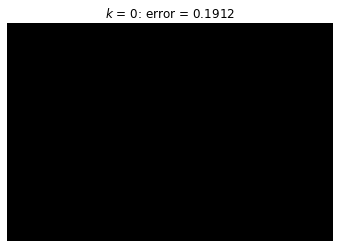

In [ ]:
# show animated results
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation 

def update(i):
    step = 50
    ani = plt.cla()
    ani = plt.imshow(approx_rank_k(U, S, Vt, i), cmap = 'gray')
    label = '$k$ = %d: error = %.4f' %(step*i, e[step*i])
    ax.set_xlabel(label)
    ani = plt.axis('off')
    ani = plt.title(label)
    return ani, ax

fig, ax = plt.subplots()
last_k = 2300
step = 50
anim = FuncAnimation(fig, update, frames=np.arange(0, int(last_k/step) + 1), interval=500)
anim.save('plot.gif', writer ='imagemagick', dpi = 300)
plt.show()

##Principal Component Analysis (PCA)

Like  Truncated  SVD,  PCA  is  a  method  that  reduces  the  dimension  of  data  andkeeps  its  main  features.   PCA  convert  the  basis  of  related  variables  to  the  basis  ofunrelated variables and maximize the variance

####Some Linear Algebra for PCA


##### Expected value and Variance


In probability theory:

**The expected value** of a random variable is the mean of all specific values of it.

**Variance** is the expectation of the squared deviation of a random variable from itsmean.

In 1-dimension data:

Given N values $x_1, x_2, \dots, x_N$. Expected value and variance of the data calculated by follow formula:
\begin{eqnarray}
\bar{x} &=& \frac{1}{N}\sum_{n=1}^N x_n = \frac{1}{N}\mathbf{X1}\ 
\end{eqnarray}
\begin{eqnarray}
var(X)=\sigma^2 &=& \frac{1}{N} \sum_{n=1}^N (x_n - \bar{x})^2
\end{eqnarray}
with $\mathbf{1} \in \mathbb{R}^N$ is a column vector that contains only $1$. Expected value is simply arithmetic mean of all value in the data. $\sigma$ is standard deviation.

In N-dimension data:

Given $N$ point of data expressed by column vectors $\mathbf{x}_1, \dots, \mathbf{x}_N$, then our **expected value vector** is calculated from this formula:
\begin{eqnarray}
\bar{\mathbf{x}} &=& \frac{1}{N} \sum_{n=1}^N \mathbf{x}_n \ 
\end{eqnarray}


##### Covariance and Covariance matrix 


**Covariance** Covarianceis a measure of the relationship between random variables.

**Covariance matrix** is  a  square matrix  with  the  variance  of  variables  in  thediagonal line and the covariance of variables in the other position.

Covariance matrix caculating formula:
\begin{eqnarray}
\mathbf{S} &=&  \frac{1}{N}\sum_{n=1}^N (\mathbf{x}_n - \bar{\mathbf{x}})(\mathbf{x}_n - \bar{\mathbf{x}})^T = \frac{1}{N}\hat{\mathbf{X}}\hat{\mathbf{X}}^T
\end{eqnarray}
In which $\hat{\mathbf{X}}=\mathbf{x}_n - \bar{\mathbf{x}}$
Example for covariance matrix of 3 features $X,Y,Z$:

$$ \Sigma = \begin{pmatrix} var(X) & cov(X,Y) & cov(X,Z)
\\ cov(X,Y) & var(Y) & cov(Y,Z) 
\\ cov(X,Y) & cov(Y,Z) & var(Z) \end{pmatrix}$$


Some features about covariance matrix:

* Every values in the main diagonal line in covariance matrix is a non-negative value. It's also a variance in each dimension of the data.
* Remaining values that not in the main diagonaline express correlation between components of the data, also called covariance. These value can be positive, negative or 0.
* If we got a diagonal covariance matrix, we got a data that has no correlation between its components or dimension.

An example image about correlation or noncorrelation data:

<img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/covx-y.jpg" width="50%" height="25%"/>



**The reason to choose covariance matrix to get the principal components of features X in PCA:**
The diagonal elements show the scatter of the variables and the correlation be-tween the variables in the other elements.  For variables whose value does not changeor change insignificantly, we consider that variable does not store too much informa-tion.  Thus, PCA is converting the original base system to a new one of uncorrelatedvariables and eliminating the variables with small variances to optimize the amountof  information  stored.   PCA  helps  reduce  the  number  of  initial  variables,  into  someimportant components, while preserving data.

####Into PCA
The idea of PCA is plotting the data into a new basis system. In that system, the importance of the components is significantly different from ignoring the least important component.

From the data X, we will split X into A and B in which the data is mainly concentrated in A, B only carries a small amount of information.

Assume the new orthonormal basis is $U$, and we want to keep $K$ points on this new basis. First, $K$ points plot almost information in the data X. This idea is shown in the below image:

<img src="https://machinelearningcoban.com/assets/27_pca/pca_idea.png" width="75%" height="50%"/>





We having: 
\begin{eqnarray*}
  \mathbf{X} &=& \mathbf{U}_K \mathbf{Z} + \bar{\mathbf{U}}_K \mathbf{Y}\\
  &=& \mathbf{A} + \mathbf{B}
\end{eqnarray*}
with $\mathbf{A} = \mathbf{U}_K \mathbf{Z}, \mathbf{B} =\bar{\mathbf{U}}_K \mathbf{Y}$. Assuming we have $A$, minimizing the loss, we approximate $B$ with a formula :
 $$B=\bar{\mathbf{U}}_K \bar{\mathbf{U}}_K^T\bar{\mathbf{x}}\mathbf{1}^T$$ 
 We can watch proof in a blog about basic ML by Vu Huu Tiep <a href="https://machinelearningcoban.com/2017/06/15/pca/">PCA - machinelearningcoban</a>.
We got:
 $$\mathbf{X} \approx \tilde{\mathbf{X}} = \mathbf{U}_K \mathbf{Z} + \bar{\mathbf{U}}_K \bar{\mathbf{U}}_K^T\bar{\mathbf{x}}\mathbf{1}^T$$

From above formula, we have our loss function:

\begin{eqnarray}
    L&=& \frac{1}{N} || \mathbf{X} - \tilde{\mathbf{X}}||_F^2 = \frac{1}{N} ||\bar{\mathbf{U}}_K \bar{\mathbf{U}}_K^T \mathbf{X} -  \bar{\mathbf{U}}_K \bar{\mathbf{U}}_K^T \bar{\mathbf{x}}\mathbf{1}^T||_F^2\\
    &=& \frac{1}{N} ||\bar{\mathbf{U}}_K \bar{\mathbf{U}}_K^T \mathbf{X} -   \bar{\mathbf{x}}\mathbf{1}^T||_F^2 \  \\
    &=& \frac{1}{N} || \bar{\mathbf{U}}_K^T (\mathbf{X} -   \bar{\mathbf{x}}\mathbf{1})^T||_F^2 ~~~(\bar{\mathbf{U}}_K\,\, orthonormal)  \  \\
    &=&  \frac{1}{N} ||\hat{\mathbf{X}}^T \bar{\mathbf{U}}_K ||_F^2 = \frac{1}{N} ||\bar{\mathbf{U}}_K^T\hat{\mathbf{X}} ||_F^2  \\
    & = & \frac{1}{N}\sum_{i = K+1}^D ||\hat{\mathbf{X}}^T\mathbf{u}_i ||_2^2\\
    &=& \sum_{i=K+1}^D \mathbf{u}_i^T\mathbf{S} \mathbf{u}_i~~(S=\hat{\mathbf{X}}\hat{\mathbf{X}}^T)
\end{eqnarray}

    
After that, we optimize the loss function:
\begin{eqnarray*}
    L&=&\sum_{i=k+1}^D \mathbf{u}_i^T\mathbf{Su}_i = \frac{1}{N-k} ||\hat{\mathbf{X}}^T\bar{\mathbf{U}}_K||_F^2\\
    &=& \frac{1}{N-k} \text{trace}(\hat{\mathbf{X}}^T\bar{\mathbf{U}}_K \bar{\mathbf{U}}_K^T \hat{\mathbf{X}})~~~(\bar{\mathbf{U}}_K\,\, orthonormal) \\ 
    &=& \frac{1}{N-k} \text{trace} (\hat{\mathbf{X}}^T \hat{\mathbf{X}})= \frac{1}{N-k} \text{trace} (\hat{\mathbf{X}} \hat{\mathbf{X}}^T) \\ 
    &=& \text{trace} (\mathbf{S}) = \sum_{i=k+1}^D \lambda_i~ (With ~\lambda_i \geq 0)\\
\end{eqnarray*}


$L$ do not depend on $U$. Function $L$ minimized $\Leftrightarrow$From $k+1$ to $D$, we have $D-k$ minimum eigenvalues of the covariance matrix. In the other words, we have the $k$ biggest eigenvalues of the covariance matrix $S$ and $u_i$ is the $k$ eigenvectors correspondingly to those eigenvalues.

Conclusion, PCA helps us to reduce dimension the basis system for the original data but still retain most of the information

( From $D$ to $K$ with $K \ll D$).










####Step By Step Computation Of PCA

Having 7 steps to compute of PCA

Step 1: Find mean vector
\begin{eqnarray}
\bar{x} &=& \frac{1}{N}\sum_{n=1}^N x_n 
\end{eqnarray}
Step 2: Subtract mean
\begin{eqnarray}
\hat{\mathbf{x}}_n = \mathbf{x}_n - \bar{\mathbf{x}}
\end{eqnarray}
Step 3: Calculate the covariance matrix for the features in the dataset
\begin{eqnarray}
\mathbf{S} = \frac{1}{N}\hat{\mathbf{X}}\hat{\mathbf{X}}^T
\end{eqnarray}
Step 4: Calculate  eigenvalues,  eigenvector  and  sort  those  eigenvalues  in  ordered  de-scending (These eigenvector must be normalized)

Step 5:  Pick $K$ eigenvector $u$ corresponding to the $K$ highest eigenvalues

Step 6: Project data to selected eigenvector.

Step 7: Reducing the dimensions of the data set
\begin{eqnarray}
\mathbf{Z} = \mathbf{U}_K^T\hat{\mathbf{X}}
\end{eqnarray}




For large datasets, we need to add the data normalization step before performing the above steps. Skipping the data normalization step can greatly affect the results. 

$$ Z = \frac{variable ~~ value - mean}{standard ~~ deviation}$$ 
It can be calculated like so:

<img src="https://machinelearningcoban.com/assets/27_pca/pca_procedure.png" width="65%" height="50%"/>

Running example PCA

Given the following data, use PCA to reduce the dimension from 2 to 1

| Feature  |  Example1 | Example 2  |Example 3|Example 4|
|---|---|---|---|---|
|  x | 4  |  8 |13   | 7  |
|  y |  11 |  4 |  5 |   14|

$$=> X=\begin{pmatrix} 4 & 8 & 13 & 7\ \\ 11 & 4 & 5 & 14 \end{pmatrix}$$

Step 1: Find mean vector

* Number of features, m=2

* Number of samples, n=4
\begin{eqnarray}
\bar{x} &=& \frac{1}{N}\sum_{n=1}^N x_n = \frac{1}{N}\mathbf{X1}
\end{eqnarray}
$$ => \bar{x} = \begin{pmatrix} 8\\ 8.5 \end{pmatrix} $$

Step 2: Subtract mean
$$\hat{\mathbf{x}}_n = \mathbf{x}_n - \bar{\mathbf{x}}$$\
$$=> \hat{X}=\begin{pmatrix} -4 & 0 & 5 & -1\ \\ 2.5 & -4.5 & -3.5 & 5.5 \end{pmatrix}$$
Step 3: Calculate the covariance matrix for the features in the dataset
\begin{eqnarray}
\mathbf{S} = \frac{1}{N}\hat{\mathbf{X}}\hat{\mathbf{X}}^T
\end{eqnarray}
$$=>S=\begin{pmatrix} var(x) & cov(x,y)\ \\ cov(y,x) & var(y)  \end{pmatrix}$$

$$=>S=\begin{pmatrix} 14 & -11\ \\ -11 & 23  \end{pmatrix}$$

Step 4: Calculate  eigenvalues,  eigenvector  and  sort  those  eigenvalues  in  ordereddescending (These eigenvector must be normalized)
$$det(S - \lambda I ) = 0$$
$$ \lambda^2 - 37\lambda + 201 = 0$$
$$=> \lambda = 30.3849 , 6.6151$$
**$\lambda$=30.3849 is first principle component** 

$with \, \lambda = 30.3849 $
$$(S - \lambda I)u_1 = 0$$
\begin{pmatrix} 14- \lambda&-11\\ -11 & 23 - \lambda \end{pmatrix} 
$$ => u_1 = \begin{pmatrix} 11\\ -16.3849 \end{pmatrix} $$
Normalizing $v_1$ we got:
$$  u_1 = \begin{pmatrix} 0.5574\\ -0.8303 \end{pmatrix} $$

Step 5:  Pick K eigenvector w. highest eigenvalues

Because the data has only 2 dimension so we skip this step.

Step 6: Project data to selected eigenvector.

$  p_{11} = u_1^T\begin{pmatrix} -4\\ 2.5 \end{pmatrix} =-4.3052$

$  p_{12} = u_1^T\begin{pmatrix} 0\\ -4.5 \end{pmatrix} =3.7361$

$  p_{13} = u_1^T\begin{pmatrix} 5\\ -3.5 \end{pmatrix} =5.6928$

$  p_{14} = u_1^T\begin{pmatrix} -1\\ 5.5 \end{pmatrix} =-5.1238$


Step 7: Reducing the dimensions of the data set
\begin{eqnarray}
\mathbf{Z} = \mathbf{U}_K^T\hat{\mathbf{X}}
\end{eqnarray}

| Feature  |  Example1 | Example 2  |Example 3|Example 4|
|---|---|---|---|---|
|  PC1 | -4.3052|  3.7361 |5.6928   | -5.1238  |








####Relation between PCA and SVD

When data has been preprocessed to have zero mean

 The data has been preprocessed to have zero mean.
\begin{eqnarray*}
\Rightarrow  S=\frac{1}{n}\mathbf X\mathbf X^\top
\end{eqnarray*}
 Cause S is a symmetric matrix, eigenvectors of S are orthogonal. Therefore, we normalize that eigenvectors and they will be orthonormal.
$$S=\frac{1}{n}\mathbf U\mathbf D\mathbf U^\top~~~(1)$$
 On the other hand, when implementing SVD, we have:
\begin{eqnarray*}
S &=&\frac{1}{n}\mathbf X\mathbf X^\top
=\frac{1}{n}(\mathbf U\mathbf \Sigma\mathbf V^\top)(\mathbf U\mathbf \Sigma\mathbf V^\top)^\top
= \frac{1}{n}(\mathbf U\mathbf \Sigma\mathbf V^\top)(\mathbf V\mathbf \Sigma\mathbf U^\top)\\
&=&\frac{1}{n}\mathbf U\mathbf \Sigma^2 \mathbf U^\top ~~~(\bar{\mathbf{U}}\,\, orthonormal) ~~~(2)
\end{eqnarray*}
 From (1) and (2), U after diagonalize covariance matrix is the same as when we factorize matrix by using SVD.
 We can approximate matrix by using Truncated SVD:
$$\mathbf{X} \approx \tilde{\mathbf{X}} = \mathbf{U}_K \mathbf{\Sigma}_K \mathbf{V}_K^T~~~(3)$$
 When we approximate by using PCA:
$$\mathbf{X} \approx \tilde{\mathbf{X}} = \mathbf{U}_K \mathbf{Z}~~~(4)$$
 From (3) and (4), $U_k$ in truncated SVD is the same as $U_k$ in PCA and 
$ \mathbf{\Sigma}_K \mathbf{V}_K^T$ in truncated SVD is $Z$ in PCA. 



#### PCA for large-scale problems

In practice, the number of data points $N$, and its dimensions $D$ are so large. Therefore, we have to find eigenvalues for a huge matrix. E.g. we have 1 Million images containing $1000 \times 1000$ pixels, so we have $D = 10^6 = N$, and it is difficult and time-consuming to find eigenvalues for a covariance matrix that is calculated from $10^6 \times 10^6$ matrix. However, we have a method to find that approximately eigenvalues quickly called __Power Method__.

##### __Power Method__

To find eigenvalues and eigenvectors for a positive semidefinite matrix $\mathbf{A} \in \mathbb{R}^{n \times n}$:
* Step 1: Choose a random vector $\mathbf{q}^{(0)} \in \mathbb{R}^n, ||\mathbf{q}^{(0)}||_2 = 1$ and $k = 1$
* Step 2: Calculate $\mathbf{z} = \mathbf{Aq}^{(k-1)}$
* Step 3: Normalize $\mathbf{q}^{(k)} = \frac{\mathbf{z}}{||\mathbf{z}||_2}$
* Step 4: While $||\mathbf{q}^{(k)} - \mathbf{q}^{(k-1)}||_2 < \epsilon
$ then stop, else $k = k + 1$ and return to step 2.

Now we have largest eigenvalue $\lambda_1 = (\mathbf{q}^{(k)})^T\mathbf{A}\mathbf{q}^{(k)}$ and corresponding eigenvector $\mathbf{q}^{(k)}$.

Now, let prove this method:

If $A$ is a positive semidefinite matrix then there exist $n$ independent eigenvectors of $A$. Let $x_1,...,x_n$ be these eigenvectors, then $x_1,...,x_n$ form a basis of $\mathbb{R}^n$. Hence the initial vector $q^{(0)}$ can be written as: $q^{(0)} = a_1x_1 + a_2x_2 + ... + a_nx_n$ where $a_1,..., a_n$ are scalars.

Multiplying both sides of the equation in $A^k$ yields:
$A^kq^{(0)} = A^k(a_1x_1 + a_2x_2 + ... + a_nx_n) = a_1A^kx_1 + a_2A^kx_2 + ... + a_nA^kx_n = a_1\lambda_1^kx_1 + a_2\lambda_2^kx_2 + ... + a_n\lambda_n^kx_n = a_1\lambda_1^k(x_1 + \sum_{j=2}^{n} \frac{a_j}{a_1}(\frac{\lambda_j}{\lambda_1})^kx_j)$

If $|\lambda_1| > |\lambda_2| \geq ... |\lambda_n| \geq 0$ then we say that $\lambda_1$ is a dominant eigenvalue. In this case $(\frac{\lambda_j}{\lambda_1})^k \to 0$ and therefore if $a_1 \neq 0, A^kq^{(0)} \to a_1\lambda_1^kx_1$. The power method normalizes the products $Aq^{(k−1)}$ to avoid overflow, therefore it converges to $x_1$.

To find the next eigenvalue and eigenvector, we have a matrix $\mathbf{B} = \mathbf{A} - \lambda_1 \mathbf{v}_1 \mathbf{v}_1^T$ that have eigenvalues $\lambda_2 \geq \lambda_3 \geq \dots \geq \lambda_n \geq 0$ and corresponding eigenvectors $\mathbf{v}_2, \mathbf{v}_3, \dots, \mathbf{v}_n$.

Prove it by using inductive method:
* With $i = 1$: 
  \begin{eqnarray}\mathbf{Bv}_1 &=& (\mathbf{A} - \lambda_1 \mathbf{v}_1\mathbf{v}_1^T) \mathbf{v_1}&= & \mathbf{Av}_1 - \lambda_1 \mathbf{v}_1 = \mathbf{0} \ \end{eqnarray}
* With $i > 1$:
\begin{eqnarray}
  \mathbf{Bv}_i &=& (\mathbf{A} - \lambda_1 \mathbf{v}_1 \mathbf{v}_1^T)\mathbf{v}_i \ 
  &=& \mathbf{Av}_i - \lambda_1 \mathbf{v}_1 (\mathbf{v}_1^T \mathbf{v}_i) \ 
  &=& \mathbf{Av}_i = \lambda_i \mathbf{v}_i
\end{eqnarray}

Hence, $(\lambda_2, \mathbf{v}_2)$ has became a large pair of eigenvalue and eigenvector of $\mathbf{B}$. Therefore, we can find this pair by using Power method for $\mathbf{B}$. Repeat this process, we can find upto eigenvalue $\mathbf{K}-th$ for covariance matrix.







####Some notice when caculating PCA in real data

There are two cases that we need to notice when caculating PCA in reality. First, the data is much smaller than the dimension of the data. Second, the training data is huge , can up to millions. The covariance matrix and eigen value caculation can be impossible. We still have solutions for those cases.

In this section, we assume that the data has been normalized, which that the data is subtracted by the expected vector. Then, the covariance matrix will calculated by this formula: $\mathbf{S} = \frac{1}{N}\mathbf{X}\mathbf{X}^T$



#####Dimension of the data is bigger than data





When $D > N$, eigen values of the covariance matrix $S$ will not larger than N. So we need to pick $K /leq N$ cause we can't pick $ K > N $ non-zero eigen value of a rank-$N$ matrix.

Caculating eigen values and eigen vectors can be be effectively implemented if we follow these features: 
* Eigen values of $A$ is equal to eigen values of $kA$ with non-zero $k$
* Eigen values of $\mathbf{AB}$ is equal to eigen values of $\mathbf{AB}$ with $ \mathbf{A} \in \mathbb{R}^{d_1 \times d_2}, \mathbf{B} \in \mathbb{R} ^{d_2 \times d_1} $ and $d_1, d_2$ is a non-zero number. 
Instead of finding eigen value in covariance matrix $\mathbf{S} \in \mathbb{R}^{D\times D}$, we can find eigen value matrix $\mathbf{T} = \mathbf{X}^T \mathbf{X} \in \mathbb{R}^{N \times N} $ having smaller dimension ($N < D$)
* Assuming $\mathbf{T} = \mathbf{X}^T \mathbf{X} \in \mathbb{R}^{N \times N}$ is a pair of eigen value-vector of $\mathbf{T} $ then $(\lambda, \mathbf{Xu})$is a pair of eigen value-vector of  $\mathbf{S}$. Proof: \begin{eqnarray}
  \mathbf{X}^T \mathbf{Xu} &=& \lambda \mathbf{u} ~~~ 
  \Rightarrow (\mathbf{X}\mathbf{X}^T)(\mathbf{Xu}) &=& \lambda \mathbf{Xu} & \
\end{eqnarray}


#####Normalization Eigen Vectors


*Recall the definition of eigenspace: The eigenspaces corresponding to the eigenvalues of a matrix are the span subspace created by all the eigenvectors corresponding to that eigenvalue.*

The last thing to do in PCA is normalizing eigenvectors so that they form an orthonormal system. This can be based on the following two points: 
* First,if $\mathbf{A}$ is a symmetric matrix, $(\lambda_1, \mathbf{x}_1), (\lambda_2, \mathbf{x}_2)$ is pairs of eigenvalue-eigenvector of A, then $\mathbf{x}_1^T\mathbf{x}_2 = 0$. In other words, any two vectors in two different eigenspaces of a symmetrical matrix are perpendicular to each other. Proof: 
\begin{eqnarray}
  \mathbf{x}_2^T \mathbf{Ax}_1 = \mathbf{x}_1^T \mathbf{Ax}_2 = \lambda_1 \mathbf{x}_2^T \mathbf{x}_1 = \lambda_2 \mathbf{x}_1^T \mathbf{x}_2 \Rightarrow \mathbf{x}_1^T \mathbf{x}_2 = 0 ~~~~~ cause ~~~\lambda_1 \neq \lambda_2 
\end{eqnarray}
* Second, with independent eigenvalues found in eigenspaces, we can use the Gram-Schmit process to normalize them into an orthonormal system.

Combining two points above, we can obtain the individual vectors to form an orthonormal system, which is the matrix $\mathbf{U}_K$ in PCA.


####Application and Example of PCA

In this section, we will present some applications and examples of PCA in reality.



##### PCA in analysis data

PCA is a great tool for analyzing high-dimensional data. We gonna create 2d data with Gaussian distribution. So we can try to analyze the data for understanding the dominant direction of variants in that data.






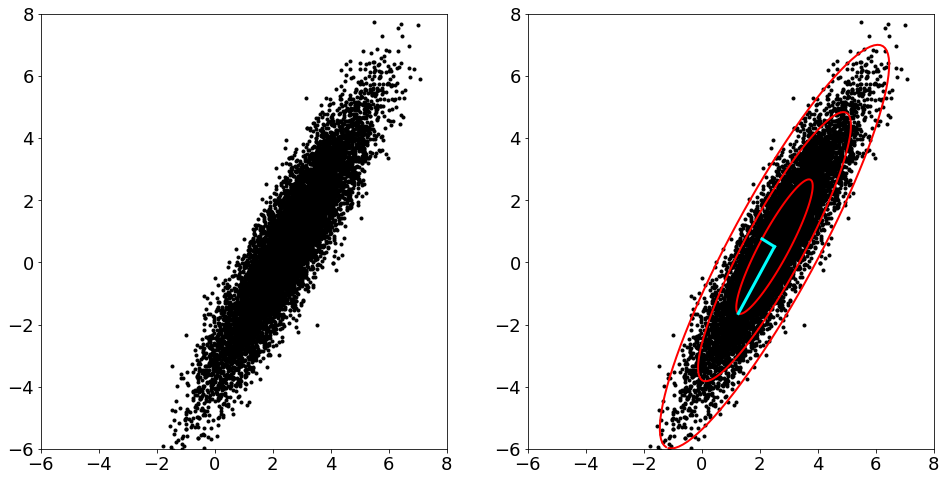

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize']=[16,8]

xC = np.array([2.5,0.5]) #center of data (mean)
sig = np.array([2.5,0.5]) #principal axes

theta = np.pi/3

R = np.array([[np.cos(theta), -np.sin(theta)], 
              [np.sin(theta),np.cos(theta)]])  #rotaion matrix
nPoints = 10000  #creating 10k points
X = R @ np.diag(sig) @ np.random.randn(2,nPoints) + np.diag(xC) @ np.ones((2,nPoints))

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0,:],X[1,:], '.', Color ='k')
ax1.grid()
plt.xlim((-6,8))
plt.ylim((-6,8))


Xavg = np.mean(X,axis = 1) #compute mean
B = X - np.tile(Xavg,(nPoints,1)).T #mean-subtracted data 
#Find PCA of data
U,S,VT = np.linalg.svd(B/np.sqrt(nPoints),full_matrices = 0)


ax2 = fig.add_subplot(122)
ax2.plot(X[0,:],X[1,:], '.', Color ='k') #plot data to overlay PCA 
ax1.grid()
plt.xlim((-6,8))
plt.ylim((-6,8))

theta = 2 * np.pi * np.arange(0,1,0.01) 

Xstd = U @ np.diag(S) @ np.array([np.cos(theta),np.sin(theta)])

ax2.plot(Xavg[0] + Xstd[0,:], Xavg[1] + Xstd[1,:], '-',color = 'r',LineWidth = 2)
ax2.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:], '-',color = 'r',LineWidth = 2)
ax2.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:], '-',color = 'r',LineWidth = 2)

#plot principal components U[:,0]S[0] and U[:,1]S[1]
ax2.plot(np.array([Xavg[0], Xavg[0] + U[0,0]*S[0] ]),
                    np.array([Xavg[1], Xavg[1] + U[1,0]*S[0] ] ), '-',color ='cyan',LineWidth = 3)
ax2.plot(np.array([Xavg[0], Xavg[0] + U[0,1]*S[1] ]),
                    np.array([Xavg[1], Xavg[1] + U[1,1]*S[1]] ), '-',color ='cyan',LineWidth = 3)
plt.show()



In [ ]:
print(S)
print(U)
print(R)

After plotting the data and its principal components. We can see singular values in $\Sigma$ almost 2.5 and 0.5. The first principal components direction has a lot of variance of 2 and the second components have a small variance of 0.5. In the $U$ matrix, we can know how the data is rotated. The first column in $U$ is the rotated first principal components direction, the same with the second column.
3 ellipse is represented for 3 standard deviation ellipse. We can know how much standard deviation a data point has.

##### Eigenfaces


In [ ]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
img = lfw_people.images
n_samples, h, w = img.shape

# load number features
X = lfw_people.data
n_features = X.shape[1]

# id of each image
y = lfw_people.target

# load number classes
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


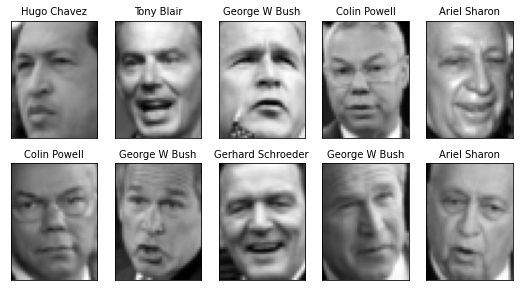

In [ ]:
# Plot true face images
import matplotlib.pyplot as plt
def plot_gallery(images, titles, show_titles = True, n_row=2, n_col=5):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if show_titles == True:
            plt.title(titles[i], size=10)
        plt.xticks(())
        plt.yticks(())
names = [target_names[i] for i in y]
plot_gallery(img, names)

In [ ]:
# PCA
from sklearn.decomposition import PCA
n_components = 150
pca = PCA(n_components, svd_solver='randomized',whiten=True)
pca.fit(X)
eigenfaces = pca.components_.reshape((n_components, h, w))
U = pca.components_.T

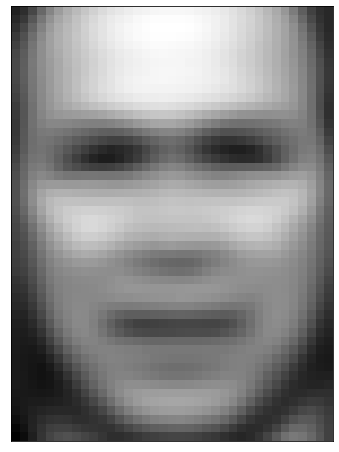

In [ ]:
# Show mean face
mean = pca.mean_.reshape(h,w)
mean.shape
plt.imshow(mean, cmap='gray',)
plt.xticks(())
plt.yticks(())
plt.show()

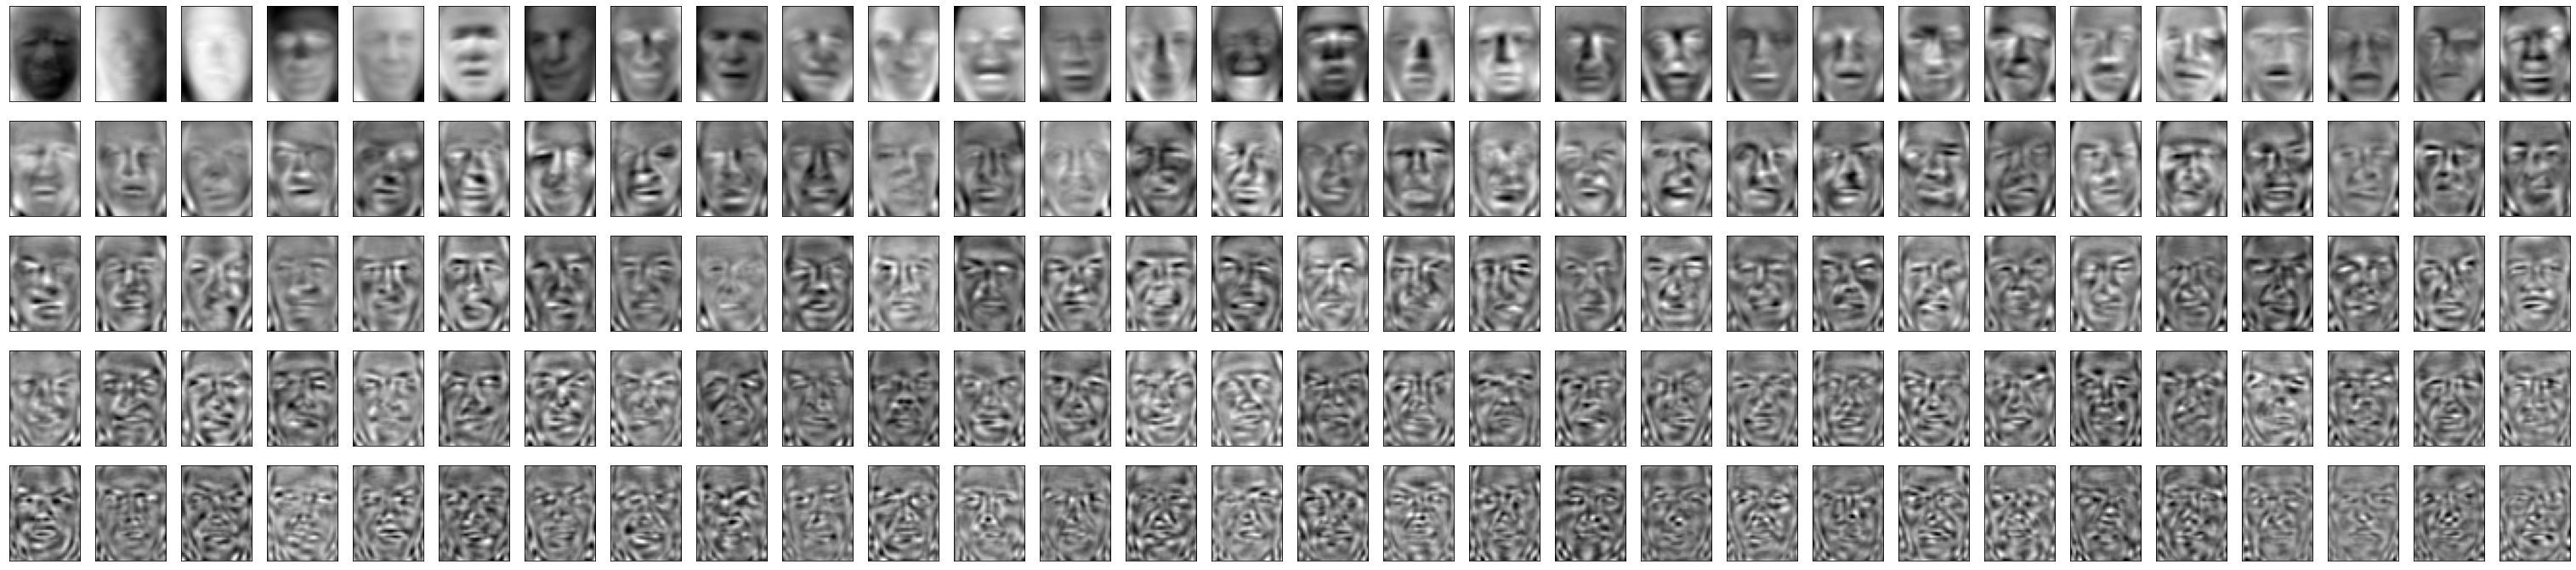

In [ ]:
# Show first 150 eigenfaces
plot_gallery(eigenfaces, '', 0, 5, 30)

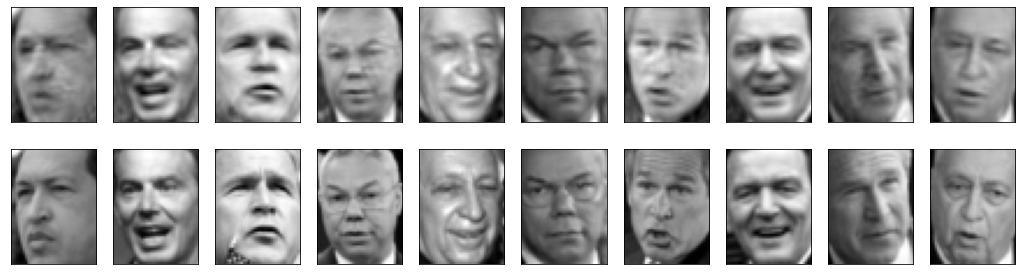

In [ ]:
# Approximate faces with PCA
import numpy as np
X_avg = np.zeros_like(X)
for i in range(X.shape[0]):
    X_avg[i] = pca.mean_
X_minus = X - X_avg
Z = U.T.dot(X_minus.T)
X_appr = U.dot(Z) + X_avg.T
img_appr = X_appr.T.reshape(n_samples,h,w)

# Show approximate faces on the first line and true faces on the second line
num_img_show = 10
img_to_show = []
for i in range(num_img_show):
    img_to_show.append(img_appr[i])
for i in range(num_img_show):
    img_to_show.append(img[i])
plot_gallery(img_to_show,'',0,2,num_img_show)

##### Eigen-gene in human gene data

We gonna analyze an Ovarian cancer data (a built data) - 216 individual patients with 4000 genetic marker that are measured for every patient. These patients are broken into group, first half have cancer, the second half have no cancer. We gonna use PCA to decompose this high dimensional data. After that, we gonna visualize the data in 3D, find relationship of the variables.

(216, 4000)


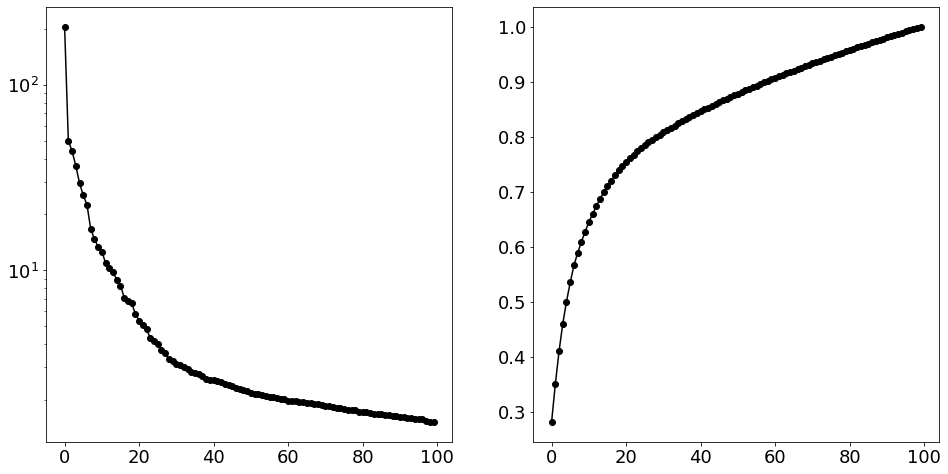

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# setting for plot
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

# get data
obs_file = '/content/ovariancancer_obs.csv'
grp_file = '/content/ovariancancer_grp.csv'
if (not os.path.exists(grp_file)):
  !gdown --id 1bvSVf1Y8SPr0uHz0arZ9bhAEqLs8yWHs -O ovariancancer_grp.csv
if (not os.path.exists(obs_file)):
  !gdown --id 1bSFhN4Ga5F36TJijUUNlK1esPHhDy5lt -O ovariancancer_obs.csv

# Read data
obs = np.loadtxt(obs_file,delimiter=',')
print(obs.shape)
f = open(grp_file, "r")
grp = f.read().split("\n")
f.close()

# PCA process function
def approximatePCA(num = 2):
    X = obs.T
    pca = PCA(n_components=num)
    Z = pca.fit_transform(obs).T
    S = pca.singular_values_
    U = pca.components_.T
    one_mat = np.ones((1,X.shape[1]))
    X_mean = pca.mean_.reshape(X.shape[0],1).dot(one_mat)
    X_appr = U.dot(Z) + X_mean
    return X_appr,Z.T,S

_, _, S = approximatePCA(100)
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.semilogy(S,'-o',color='k',)
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='k')
plt.show()

The first plot is plotting the result of log-scale eigenvalues in $\Sigma$. The second plot is the result of dividing the cumulative sum and the sum of eigenvalues in $\Sigma$, it represents how much variance is captured by the first $k$ eigenvalues $${\frac{\sum_{i=1}^k \sigma_i^2}{\sum_{j = 1}^r \sigma_j^2}}$$

We can see in the first plot. Only about the first 25 eigenvalues is considerably large. After 50 eigenvalues, the value is slowly decreased. This means only the first 25 eigenvalues contain a big variance of the dataset, so it does capture lots of information about our dataset. In the second plot, dividing cumulative sum and the sum of eigenvalues of first 2 eigenvalues is more than 0.6 -  we know that the first 2 eigenvalues capture more than 60% the variance of the dataset or more than 60% percent information of the dataset.

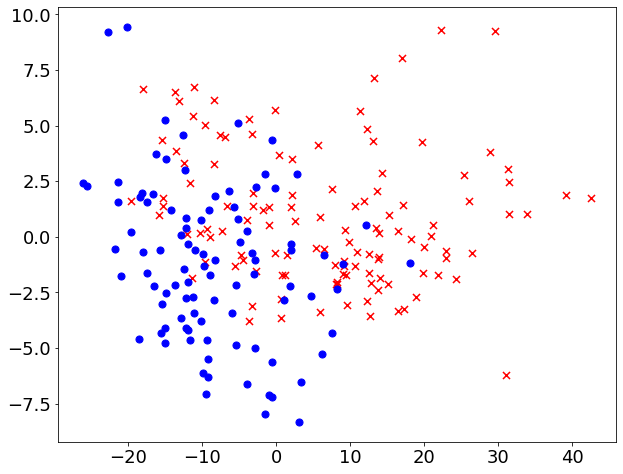

In [ ]:
# Plot the first 2 eigengenes
fig2 = plt.figure(figsize=(10, 8))
ax = fig2.add_subplot()
X_appr, Z, _ = approximatePCA(2)
for i in range(obs.shape[0]):
    if grp[i] == 'Cancer':
        ax.scatter(Z[i,0],Z[i,1],marker='x',color='r',s=50)
    else:
        ax.scatter(Z[i,0],Z[i,1],marker='o',color='b',s=50)
plt.show()

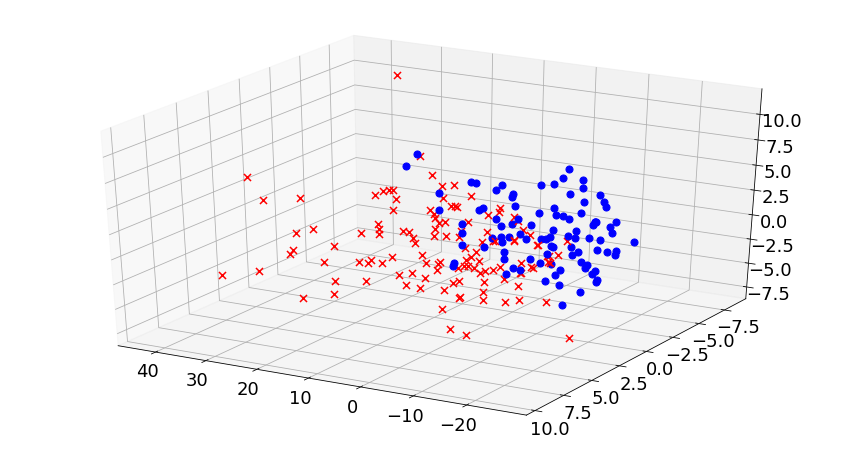

In [ ]:
# Plot the first 3 eigengenes
fig2 = plt.figure(figsize=(15, 8))
ax = fig2.add_subplot(projection='3d')
X_appr, Z, _ = approximatePCA(3)
for i in range(obs.shape[0]):
    if grp[i] == 'Cancer':
        ax.scatter(Z[i,0],Z[i,1],Z[i,2],zdir='z',marker='x',color='r',s=50)
    else:
        ax.scatter(Z[i,0],Z[i,1],Z[i,2],zdir='z',marker='o',color='b',s=50)
ax.view_init(30,120)
plt.show()

In this plot, red x marks represent cancer patients, blue dots represent non-cancer patients. We can see cancer patients cluster in an area on the left side, the same with non-cancer patients but they cluster on the right side. So our cancer or non-cancer patients have a relation in the gene data.

###Conclusion

After diving into SVD and PCA, we know that these techniques are powerful for analyzing, reducing high dimensional data. And we also can use these techniques for classifying and compressing data. Besides the advantages of these techniques, it does have drawbacks: information loss, becoming less interpretable. In general, Principal Components Analysis and Singular Value Decomposition is great to use in any situation when working which big data.